**Can we state there is gender pay gap in this company?**

The company has more than 5000 employees and we analyse a sample with size 174

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Probability_Statistics/Exercises/GenderPayGap/HR_Data.csv")
df

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Bold,Caroline,63,Female,United States,White,02/07/2012,Executive Office,President & CEO,166400.0
1,Zamora,Jennifer,38,Female,United States,White,10/04/2010,IT/IS,CIO,135200.0
2,Houlihan,Debra,51,Female,United States,White,05/05/2014,Sales,Director of Sales,124800.0
3,Bramante,Elisa,34,Female,United States,Black or African American,05/01/2009,Production,Director of Operations,124800.0
4,Del Bosque,Keyla,38,Female,United States,Black or African American,09/01/2012,Software Engineering,Software Engineer,118809.6
...,...,...,...,...,...,...,...,...,...,...
169,Osturnka,Adeel,41,Male,United States,White,30/09/2013,Production,Production Technician I,33280.0
170,Punjabhi,Louis,56,Male,United States,White,06/01/2014,Production,Production Technician I,33280.0
171,Cockel,James,40,Male,United States,White,08/07/2013,Production,Production Technician I,31200.0
172,Gordon,David,38,Male,United States,White,02/07/2012,Production,Production Technician I,31200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Surname     174 non-null    object 
 1   Name        174 non-null    object 
 2   Age         174 non-null    int64  
 3   Gender      174 non-null    object 
 4   Country     174 non-null    object 
 5   Ethnicity   174 non-null    object 
 6   Start_date  174 non-null    object 
 7   Department  174 non-null    object 
 8   Position    174 non-null    object 
 9   Salary      174 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 13.7+ KB


In [5]:
print(f"# female: {len(df[df['Gender']=='Female'])}")
print(f"# male: {len(df[df['Gender']=='Male'])}")

# female: 98
# male: 76


In [6]:
df_female = df[df['Gender']=='Female']
df_male = df[df['Gender']=='Male']

In [7]:
df_female['Salary'].mean()

65736.91428571429

In [8]:
df_male['Salary'].mean()

72300.52631578948

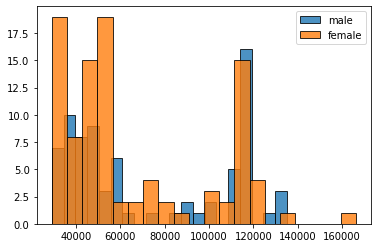

In [13]:
plt.hist(df_male['Salary'], bins=20, edgecolor='black', label='male', alpha=0.8)
plt.hist(df_female['Salary'], bins=20, edgecolor='black', label='female', alpha=0.8)

plt.legend()
plt.show()

#### **Hypothesis testing**
Null hypothesis: $μ_{m}-\mu_{f} = 0$

Alternative hypothesis: $μ_{m}-\mu_{f} > 0$

##### Overall

In [10]:
alpha = 0.05

# two sample test
t_score, p_value, _ = ttest_ind(x1=df_male['Salary'], x2=df_female['Salary'], value=0, alternative='larger')
print(f"t_score: {np.round(t_score, 2)}, p_value: {np.round(p_value, 2)}")

print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")


t_score: 1.26, p_value: 0.1
Fail to reject null hypotesis


##### Below 35 years

In [11]:
alpha = 0.05
sample_male_below_35 = df_male.loc[df_male['Age']<=35, 'Salary']
sample_female_below_35 = df_female.loc[df_female['Age']<=35, 'Salary']


# two sample test
t_score, p_value, _ = ttest_ind(x1=sample_male_below_35, x2=sample_female_below_35, value=0, alternative='larger')
print(f"t_score: {np.round(t_score, 2)}, p_value: {np.round(p_value, 2)}")

print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")

t_score: 0.26, p_value: 0.4
Fail to reject null hypotesis


##### Above 35 years

In [12]:
alpha = 0.05
sample_male_above_35 = df_male.loc[df_male['Age']>35, 'Salary']
sample_female_above_35 = df_female.loc[df_female['Age']>35, 'Salary']


# two sample test
t_score, p_value, _ = ttest_ind(x1=sample_male_above_35, x2=sample_female_above_35, value=0, alternative='larger')
print(f"t_score: {np.round(t_score, 2)}, p_value: {np.round(p_value, 2)}")

print("Reject null hypotesis") if (p_value < alpha) else print("Fail to reject null hypotesis")

t_score: 1.43, p_value: 0.08
Fail to reject null hypotesis
